Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load in csv files
df_stations = pd.read_csv("df_stations.csv")

In [3]:
fs_df = pd.read_csv("fs_df_with_totals.csv")

In [4]:
df_stations.head(1)

,Empty Slots,Available Bikes,Station ID,latitude,longitude,Station Name,Data Collection Timestamp,Total Slots,Status
0,16,19,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,0001 10th & Cambie,2022-11-08T01:19:40.179000Z,35,online


In [5]:
#Rearrange columns for readability
cols = list(df_stations.columns.values)
print(cols)

['Empty Slots', 'Available Bikes', 'Station ID', 'latitude', 'longitude', 'Station Name', 'Data Collection Timestamp', 'Total Slots', 'Status']


In [6]:
df_stations = df_stations[['Station ID', 'Station Name', 'latitude', 'longitude', 'Empty Slots', 'Available Bikes', 'Total Slots']]
df_stations.head(1)

,Station ID,Station Name,latitude,longitude,Empty Slots,Available Bikes,Total Slots
0,7a19c49f486d7c0c02b3685d7b240448,0001 10th & Cambie,49.262487,-123.114397,16,19,35


In [7]:
df_stations["Proportion of Available Bikes (%)"] = round(df_stations["Available Bikes"] / df_stations["Total Slots"] * 100,0)
df_stations.head(2)

,Station ID,Station Name,latitude,longitude,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%)
0,7a19c49f486d7c0c02b3685d7b240448,0001 10th & Cambie,49.262487,-123.114397,16,19,35,54.0
1,32603a87cfca71d0f7dfa3513bad69d5,0004 Yaletown-Roundhouse Station,49.274566,-123.121817,7,9,16,56.0


In [8]:
fs_df.head(2)

,Station ID,latitude,longitude,Bars - All,Bars - Open,Restaurants - All,Restaurants - Open,Shopping - All,Shopping - Open,Education - All,Education - Open,Arts and Entertainment - All,Arts and Entertainment - Open,Total - All Venues,Total - Open Venues
0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,1,1,7,3,4,1,1,1,1,0,14,6
1,32603a87cfca71d0f7dfa3513bad69d5,49.274566,-123.121817,7,2,25,15,23,10,2,0,3,0,60,27


In [9]:
fs_df = fs_df.drop(labels=["latitude", "longitude"], axis=1)
fs_df.head(2)

,Station ID,Bars - All,Bars - Open,Restaurants - All,Restaurants - Open,Shopping - All,Shopping - Open,Education - All,Education - Open,Arts and Entertainment - All,Arts and Entertainment - Open,Total - All Venues,Total - Open Venues
0,7a19c49f486d7c0c02b3685d7b240448,1,1,7,3,4,1,1,1,1,0,14,6
1,32603a87cfca71d0f7dfa3513bad69d5,7,2,25,15,23,10,2,0,3,0,60,27


In [10]:
#Create combined df
df_combined = df_stations.merge(fs_df, on="Station ID", how='left')
df_combined.head(2)

,Station ID,Station Name,latitude,longitude,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%),Bars - All,Bars - Open,Restaurants - All,Restaurants - Open,Shopping - All,Shopping - Open,Education - All,Education - Open,Arts and Entertainment - All,Arts and Entertainment - Open,Total - All Venues,Total - Open Venues
0,7a19c49f486d7c0c02b3685d7b240448,0001 10th & Cambie,49.262487,-123.114397,16,19,35,54.0,1.0,1.0,7.0,3.0,4.0,1.0,1.0,1.0,1.0,0.0,14.0,6.0
1,32603a87cfca71d0f7dfa3513bad69d5,0004 Yaletown-Roundhouse Station,49.274566,-123.121817,7,9,16,56.0,7.0,2.0,25.0,15.0,23.0,10.0,2.0,0.0,3.0,0.0,60.0,27.0


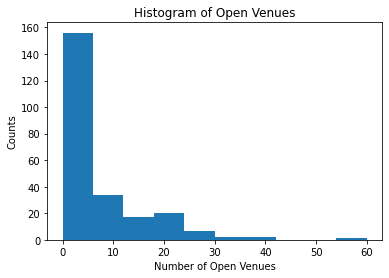

In [11]:
#look at distribution of total number of open businesses.
fig, ax = plt.subplots()
ax.hist(df_combined["Total - Open Venues"], bins = 10)

#Customize plot
ax.set_title("Histogram of Open Venues")
ax.set_xlabel("Number of Open Venues")
ax.set_ylabel('Counts')

#Displat the plot
plt.show()


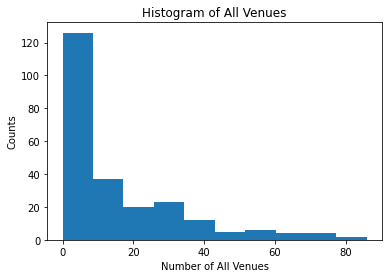

In [12]:
#look at distribution of total number of businesses (open and closed).
fig, ax = plt.subplots()
ax.hist(df_combined["Total - All Venues"])

#Customize plot
ax.set_title("Histogram of All Venues")
ax.set_xlabel("Number of All Venues")
ax.set_ylabel('Counts')

#Displat the plot
plt.show()

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [13]:
#Create df of columns to look at correlation for open venues. 

open_correlation_df = df_combined[['Empty Slots', 'Available Bikes', 'Total Slots', 'Proportion of Available Bikes (%)', 'Bars - Open', 'Restaurants - Open', 'Shopping - Open', 'Education - Open', 'Arts and Entertainment - Open', 'Total - Open Venues']]
open_correlation_df.head(2)

,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%),Bars - Open,Restaurants - Open,Shopping - Open,Education - Open,Arts and Entertainment - Open,Total - Open Venues
0,16,19,35,54.0,1.0,3.0,1.0,1.0,0.0,6.0
1,7,9,16,56.0,2.0,15.0,10.0,0.0,0.0,27.0


In [14]:
open_correlation_df.corr()

,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%),Bars - Open,Restaurants - Open,Shopping - Open,Education - Open,Arts and Entertainment - Open,Total - Open Venues
Empty Slots,1.000000,-0.560965,0.480242,-0.808078,0.081201,-0.015038,-0.067019,0.021419,-0.095965,-0.045544
Available Bikes,-0.560965,1.000000,0.452941,0.886866,0.076620,0.202459,0.210332,0.134494,0.141493,0.240093
Total Slots,0.480242,0.452941,1.000000,0.066684,0.166735,0.194107,0.145752,0.160395,0.041893,0.199698
Proportion of Available Bikes (%),-0.808078,0.886866,0.066684,1.000000,-0.019305,0.115833,0.137297,0.040466,0.118909,0.143238
Bars - Open,0.081201,0.076620,0.166735,-0.019305,1.000000,0.542371,0.372032,0.433876,0.172078,0.576540
Restaurants - Open,-0.015038,0.202459,0.194107,0.115833,0.542371,1.000000,0.576862,0.272423,0.158056,0.867577
Shopping - Open,-0.067019,0.210332,0.145752,0.137297,0.372032,0.576862,1.000000,0.276033,0.235418,0.890389
Education - Open,0.021419,0.134494,0.160395,0.040466,0.433876,0.272423,0.276033,1.000000,0.150944,0.397296
Arts and Entertainment - Open,-0.095965,0.141493,0.041893,0.118909,0.172078,0.158056,0.235418,0.150944,1.000000,0.314661
Total - Open Venues,-0.045544,0.240093,0.199698,0.143238,0.576540,0.867577,0.890389,0.397296,0.314661,1.000000


In [15]:
#Subset for useful correlation info
#open venues
relevant_open_corr_df = open_correlation_df.corr().iloc[4:,0:4]
relevant_open_corr_df

,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%)
Bars - Open,0.081201,0.076620,0.166735,-0.019305
Restaurants - Open,-0.015038,0.202459,0.194107,0.115833
Shopping - Open,-0.067019,0.210332,0.145752,0.137297
Education - Open,0.021419,0.134494,0.160395,0.040466
Arts and Entertainment - Open,-0.095965,0.141493,0.041893,0.118909
Total - Open Venues,-0.045544,0.240093,0.199698,0.143238


In [16]:
comb_cols = list(df_combined.columns.values)
print(comb_cols)

['Station ID', 'Station Name', 'latitude', 'longitude', 'Empty Slots', 'Available Bikes', 'Total Slots', 'Proportion of Available Bikes (%)', 'Bars - All', 'Bars - Open', 'Restaurants - All', 'Restaurants - Open', 'Shopping - All', 'Shopping - Open', 'Education - All', 'Education - Open', 'Arts and Entertainment - All', 'Arts and Entertainment - Open', 'Total - All Venues', 'Total - Open Venues']


In [17]:
#Create df of columns to look at correlation for total venues. 

total_correlation_df = df_combined[['Empty Slots', 'Available Bikes', 'Total Slots', 'Proportion of Available Bikes (%)', 'Bars - All', 'Restaurants - All', 'Shopping - All', 'Education - All', 'Arts and Entertainment - All', 'Total - All Venues']]
total_correlation_df.head(2)

,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%),Bars - All,Restaurants - All,Shopping - All,Education - All,Arts and Entertainment - All,Total - All Venues
0,16,19,35,54.0,1.0,7.0,4.0,1.0,1.0,14.0
1,7,9,16,56.0,7.0,25.0,23.0,2.0,3.0,60.0


In [18]:
total_correlation_df.corr()

,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%),Bars - All,Restaurants - All,Shopping - All,Education - All,Arts and Entertainment - All,Total - All Venues
Empty Slots,1.000000,-0.560965,0.480242,-0.808078,0.030488,-0.016357,-0.072876,-0.001160,-0.077830,-0.050306
Available Bikes,-0.560965,1.000000,0.452941,0.886866,0.075590,0.211310,0.261111,0.113321,0.202670,0.258458
Total Slots,0.480242,0.452941,1.000000,0.066684,0.107755,0.201846,0.193834,0.115751,0.124676,0.214309
Proportion of Available Bikes (%),-0.808078,0.886866,0.066684,1.000000,0.010171,0.117042,0.163216,0.050501,0.139318,0.151718
Bars - All,0.030488,0.075590,0.107755,0.010171,1.000000,0.638370,0.429765,0.359993,0.427529,0.624459
Restaurants - All,-0.016357,0.211310,0.201846,0.117042,0.638370,1.000000,0.663649,0.368491,0.366630,0.855473
Shopping - All,-0.072876,0.261111,0.193834,0.163216,0.429765,0.663649,1.000000,0.502973,0.525581,0.928638
Education - All,-0.001160,0.113321,0.115751,0.050501,0.359993,0.368491,0.502973,1.000000,0.318719,0.614316
Arts and Entertainment - All,-0.077830,0.202670,0.124676,0.139318,0.427529,0.366630,0.525581,0.318719,1.000000,0.589962
Total - All Venues,-0.050306,0.258458,0.214309,0.151718,0.624459,0.855473,0.928638,0.614316,0.589962,1.000000


In [19]:
#Subset for useful correlation info
#total venues
relevant_total_corr_df = total_correlation_df.corr().iloc[4:,0:4]
relevant_total_corr_df

,Empty Slots,Available Bikes,Total Slots,Proportion of Available Bikes (%)
Bars - All,0.030488,0.075590,0.107755,0.010171
Restaurants - All,-0.016357,0.211310,0.201846,0.117042
Shopping - All,-0.072876,0.261111,0.193834,0.163216
Education - All,-0.001160,0.113321,0.115751,0.050501
Arts and Entertainment - All,-0.077830,0.202670,0.124676,0.139318
Total - All Venues,-0.050306,0.258458,0.214309,0.151718


In [20]:
import seaborn as sns

<AxesSubplot:>

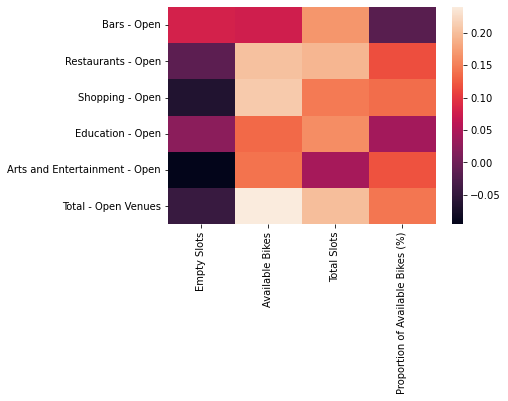

In [21]:
sns.heatmap(relevant_open_corr_df)

<AxesSubplot:>

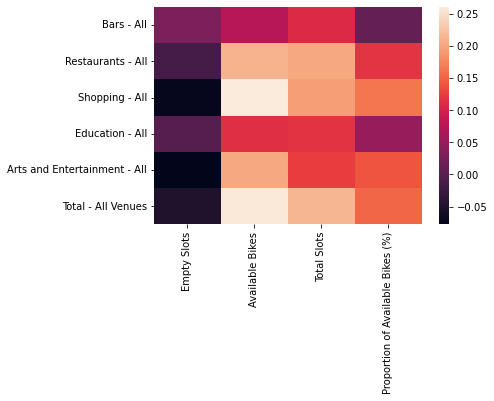

In [22]:
sns.heatmap(relevant_total_corr_df)

In [23]:
import seaborn as sns

In [ ]:
sns.pairplot(open_correlation_df)
plt.show()

In [ ]:
sns.pairplot(total_correlation_df)
plt.show()

In [ ]:
#Hypotheses to test: 
#Larger bike stations are installed where there are more businesses within 100 m - use Pearson's Correlation Coefficient
#Larger bike stations are installed where there are more restaurants within 100 m - use Pearson's Correlation Coefficient

In [ ]:
from scipy import stats

In [ ]:
df_combined.head(1)

In [ ]:
#Set variables for hypothesis testing
total_slots = df_combined["Total Slots"]
total_venues = df_combined["Total - All Venues"]
total_restaurants = df_combined["Restaurants - All"]

In [ ]:
#Check if any/all variables follow normal distributions. 
#Check using Shapiro-Wilk Tests
#Null hypothesis is that data is normally distributed
stat, p = stats.shapiro(total_slots)
if p >= 0.05:
    print("total_slots is normally distributed")
else:
    print("total_slots is not normally distributed")

stat, p = stats.shapiro(total_venues)
if p >= 0.05:
    print("total_venues is normally distributed")
else:
    print("total_venues is not normally distributed")

stat, p = stats.shapiro(total_restaurants)
if p >= 0.05:
    print("total_restaurants is normally distributed")
else:
    print("total_restaurants is not normally distributed")

In [ ]:
#Test 1: 
#Are larger bike stations are installed where there are more businesses within 100 m
#Use Pearson's Correlation Coefficient

#Data to compare:
#Total slots - call list total_slots
#Number of total venues - total_venues
#Null hypothesis: total_slots and total_venues are NOT correlated.
#Pull this data from df_combined


stat, p = stats.pearsonr(total_slots, total_venues)
print(p)

In [ ]:
#p-value < 0.05, so can reject the null hypothesis. Variables are correlated. 
#However data is not normally distributed, so I'm not sure if this is very useful. 

In [ ]:
#Test 2: 
#Larger bike stations are installed where there are more restaurants within 100 m
#Use Pearson's Correlation Coefficient

stat, p = stats.pearsonr(total_slots, total_restaurants)
print(p)

In [ ]:
#p-value < 0.05, so can reject the null hypothesis. Variables are correlated. 
#However data is not normally distributed, so I'm not sure if this is very useful.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
#Create 6 tables for database
#starting point for tables is: 
    #df_stations
        #split into station_locations and station_docks
    #fs_df
        #split into fs_venues and fs_venues_open
    #yelp_df
        #split into yelp_venues and yelp_venues_open

In [ ]:
df_stations.head(2)

In [ ]:
fs_df.head(2)

In [ ]:
#Import yelp df from stored csv
yelp_df = pd.read_csv("yelp_df_with_totals.csv")
yelp_df.head(2)

In [ ]:
#Split df_stations into station_locations and station_docks
df_stations_col_list = list(df_stations.columns.values)
print(df_stations_col_list)

In [ ]:
station_locations = df_stations[['Station ID', 'Station Name', 'latitude', 'longitude']]
station_docks = df_stations[['Station ID', 'Empty Slots', 'Available Bikes', 'Total Slots', 'Proportion of Available Bikes (%)']]

In [ ]:
station_locations.head(2)

In [ ]:
station_docks.head(2)

In [ ]:
#Split fs_df into fs_venues and fs_venues_open
fs_df_col_list = list(fs_df.columns.values)
print(fs_df_col_list)

In [ ]:
fs_venues = fs_df[['Station ID', 'Bars - All', 'Restaurants - All', 'Shopping - All', 'Education - All', 'Arts and Entertainment - All', 'Total - All Venues']]
fs_venues_open = fs_df[['Station ID', 'Bars - Open', 'Restaurants - Open', 'Shopping - Open', 'Education - Open', 'Arts and Entertainment - Open', 'Total - Open Venues']]

In [ ]:
fs_venues.head(2)

In [ ]:
fs_venues_open.head(2)

In [ ]:
#Split yelp_df into yelp_venues and yelp_venues_open
yelp_df_col_list = list(yelp_df.columns.values)
print(yelp_df_col_list)

In [ ]:
yelp_venues = fs_df[['Station ID', 'Bars - All', 'Restaurants - All', 'Shopping - All', 'Education - All', 'Arts and Entertainment - All', 'Total - All Venues']]
yelp_venues_open = fs_df[['Station ID', 'Bars - Open', 'Restaurants - Open', 'Shopping - Open', 'Education - Open', 'Arts and Entertainment - Open', 'Total - Open Venues']]

In [ ]:
yelp_venues.head(2)

In [ ]:
yelp_venues_open.head(2)

In [ ]:
station_locations = station_locations.set_index("Station ID")

In [ ]:
#Set index for all tables: 

#station_locations
#station_docks

station_docks = station_docks.set_index("Station ID")

#fs_venues
#fs_venues_open
fs_venues = fs_venues.set_index("Station ID")
fs_venues_open = fs_venues_open.set_index("Station ID")

#yelp_venues
#yelp_venues_open
yelp_venues = yelp_venues.set_index("Station ID")
yelp_venues_open = yelp_venues_open.set_index("Station ID")

In [ ]:
station_locations.head(2)

In [ ]:
station_docks.head(2)

In [ ]:
fs_venues.head(2)

In [ ]:
fs_venues_open.head(2)

In [ ]:
yelp_venues.head(2)

In [ ]:
yelp_venues_open.head(2)

In [ ]:
import pandas as pd

In [ ]:
#Save all dfs for db as csv. 
station_docks.to_csv("station_docks.csv")
fs_venues.to_csv("fs_venues.csv")
fs_venues_open.to_csv("fs_venues_open.csv")
yelp_venues.to_csv("yelp_venues.csv")
yelp_venues_open.to_csv("yelp_venues_open.csv")

In [ ]:
station_locations = pd.read_csv("station_locations.csv")
station_docks = pd.read_csv("station_docks.csv")
fs_venues = pd.read_csv("fs_venues.csv")
fs_venues_open = pd.read_csv("fs_venues_open.csv")
yelp_venues = pd.read_csv("yelp_venues.csv")
yelp_venues_open = pd.read_csv("yelp_venues_open.csv")

In [ ]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
        
    return connection

In [ ]:
connection = create_connection("sm_app.sqlite")

In [ ]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

Look at the data before and after the join to validate your data.

In [ ]:
station_docks.to_sql("station_docks2", connection, if_exists="replace")

In [ ]:
connection.close()

In [ ]:
con = sqlite3.connect("stats_project_db.sqlite")

In [ ]:
station_docks.to_sql("station_docks", con, if_exists="replace")

In [ ]:
station_locations.to_sql("station_locations", con, if_exists="replace")
fs_venues.to_sql("fs_venues", con, if_exists="replace")
fs_venues_open.to_sql("fs_venues_open", con, if_exists="replace")
yelp_venues.to_sql("yelp_venues", con, if_exists="replace")
yelp_venues_open.to_sql("yelp_venues_open", con, if_exists="replace")

In [ ]:
add_key_query_docks = """
ALTER TABLE station_docks
ADD PRIMARY KEY (station_id);
"""

In [ ]:
execute_query(con, add_key_query_docks)

In [ ]:
fs_venues_open.head()

In [ ]:
station_locations.head(1)

In [ ]:
station_locations = station_locations.set_index("Station ID")

In [ ]:
station_locations.head()

In [ ]:
station_docks = station_docks.set_index("Station ID")

In [ ]:
station_docks.head()

In [ ]:
fs_venues = fs_venues.set_index("Station ID")

In [ ]:
fs_venues.head()

In [ ]:
fs_venues_open.head()

In [ ]:
yelp_venues.head()

In [ ]:
yelp_venues_open.head()

In [ ]:
con.close()

In [ ]:
con = sqlite3.connect("stats_project.sqlite")

In [ ]:
station_docks.to_sql("station_docks", con, if_exists="replace")
station_locations.to_sql("station_locations", con, if_exists="replace")
fs_venues.to_sql("fs_venues", con, if_exists="replace")
fs_venues_open.to_sql("fs_venues_open", con, if_exists="replace")
yelp_venues.to_sql("yelp_venues", con, if_exists="replace")
yelp_venues_open.to_sql("yelp_venues_open", con, if_exists="replace")

In [ ]:
fk_docks_query = """
    PRAGMA foreign_keys=off;

    BEGIN TRANSACTION;

    ALTER TABLE station_docks RENAME TO station_docks_old;

    CREATE TABLE station_docks
    ( 
        "Station ID" TEXT NOT NULL,
        "Empty Slots" INTEGER,
        "Available Bikes" INTEGER,
        "Total Slots" INTEGER,
        "Proportion of Available Bikes (%)" REAL
        CONSTRAINT fk_station_id
        FOREIGN KEY ("Station ID")
        REFERENCES station_locations("Station ID")
    );

    INSERT INTO station_docks SELECT * FROM station_docks_old;

    COMMIT;

    PRAGMA foreign_keys=on;
"""

In [ ]:
con.close()

In [ ]:
bike_stations = pd.read_csv("df_stations.csv")
fs_locations = pd.read_csv("fs_df_with_totals.csv")

In [ ]:
bike_stations.head(2)

In [ ]:
bike_stations["Proportion of Available Bikes (%)"] = round(bike_stations["Available Bikes"] / bike_stations["Total Slots"] * 100,0)

In [ ]:
bike_station_cols = list(bike_stations.columns.values)
print(bike_station_cols)

In [ ]:
bike_stations_for_db = bike_stations[['Station ID', 'Station Name', 'Available Bikes', 'Empty Slots', 'Total Slots', 'Proportion of Available Bikes (%)']]

In [ ]:
bike_stations_for_db.head(2)

In [ ]:
bike_stations_for_db = bike_stations_for_db.set_index("Station ID")

In [ ]:
bike_stations_for_db.head(2)

In [ ]:
fs_locations.head(2)

In [ ]:
fs_locations_cols = list(fs_locations.columns.values)
print(fs_locations_cols)

In [ ]:
fs_locations_for_db = fs_locations[['latitude', 'longitude', 'Station ID', 'Bars - All', 'Bars - Open', 'Restaurants - All', 'Restaurants - Open', 'Shopping - All', 'Shopping - Open', 'Education - All', 'Education - Open', 'Arts and Entertainment - All', 'Arts and Entertainment - Open', 'Total - All Venues', 'Total - Open Venues']]

In [ ]:
fs_locations_for_db.head(2)

In [ ]:
fs_locations_for_db = fs_locations_for_db.set_index(["latitude", "longitude"])

In [ ]:
fs_locations_for_db.head(2)

In [ ]:
con = sqlite3.connect("stats_project_wk3.sqlite")

In [ ]:
bike_stations_for_db.to_sql("bike_stations", con, if_exists="replace")

In [ ]:
fs_locations_for_db.to_sql("fs_locations", con, if_exists="replace")

In [ ]:
create_fk = """
CREATE TABLE fs_loc_with_fk
(
  "latitude" REAL NOT NULL,
  "longitude" REAL NOT NULL,
  "Station ID" TEXT NOT NULL,
  "Bars - All" INTEGER,
  "Bars - Open" INTEGER,
  "Restaurants - All" INTEGER,
  "Restaurants - Open" INTEGER,
  "Shopping - All" INTEGER,
  "Shopping - Open" INTEGER,
  "Education - All" INTEGER,
  "Education - Open" INTEGER,
  "Arts and Entertainment - All" INTEGER,
  "Arts and Entertainment - Open" INTEGER,
  "Total - All Venues" INTEGER,
  "Total - Open Venues" INTEGER,
    CONSTRAINT lat_long PRIMARY KEY ("latitude", "longitude"),
    CONSTRAINT fk_station_ids FOREIGN KEY ("Station ID") REFERENCES bike_stations ("Station ID")
);
"""

In [ ]:
execute_query(con, create_fk)

In [ ]:
create_pk = """
CREATE TABLE stations_with_pk
(
    "Station ID" TEXT NOT NULL PRIMARY KEY,
    "Station Name" TEXT,
    "Available Bikes" INTEGER,
    "Empty Slots" INTEGER,
    "Total Slots" INTEGER,
    "Proportion of Available Bikes (%)" REAL
)
"""

In [ ]:
execute_query(con, create_pk)

In [ ]:
drop_table_fs_loc_with_fk = """
    DROP TABLE fs_loc_with_fk
"""

In [ ]:
execute_query(con, drop_table_fs_loc_with_fk)

In [ ]:
create_fk = """
CREATE TABLE fs_loc_with_fk
(
  "latitude" REAL NOT NULL,
  "longitude" REAL NOT NULL,
  "Station ID" TEXT NOT NULL,
  "Bars - All" INTEGER,
  "Bars - Open" INTEGER,
  "Restaurants - All" INTEGER,
  "Restaurants - Open" INTEGER,
  "Shopping - All" INTEGER,
  "Shopping - Open" INTEGER,
  "Education - All" INTEGER,
  "Education - Open" INTEGER,
  "Arts and Entertainment - All" INTEGER,
  "Arts and Entertainment - Open" INTEGER,
  "Total - All Venues" INTEGER,
  "Total - Open Venues" INTEGER,
    CONSTRAINT lat_long PRIMARY KEY ("latitude", "longitude"),
    CONSTRAINT fk_station_ids FOREIGN KEY ("Station ID") REFERENCES stations_with_pk ("Station ID")
);
"""

In [ ]:
execute_query(con, create_fk)

In [ ]:
insert_into_station_table = """
INSERT INTO stations_with_pk SELECT * FROM bike_stations
"""

In [ ]:
execute_query(con, insert_into_station_table)

In [ ]:
insert_into_fs_table = """
INSERT INTO fs_loc_with_fk SELECT * FROM fs_locations
"""

In [ ]:
execute_query(con, insert_into_fs_table)

In [ ]:
drop_old_fs_table = """
    DROP TABLE fs_locations;
"""

In [ ]:
execute_query(con, drop_old_fs_table)

In [ ]:
drop_old_station_table = """
    DROP TABLE bike_stations;
"""

In [ ]:
execute_query(con, drop_old_station_table)

In [ ]:
rename_bike_table = """
    ALTER TABLE stations_with_pk RENAME TO bike_stations;
"""

In [ ]:
execute_query(con, rename_bike_table)

In [ ]:
rename_fs_table = """
    ALTER TABLE fs_loc_with_fk RENAME TO fs_locations;
"""

In [ ]:
execute_query(con, rename_fs_table)

In [ ]:
fs_df = pd.read_csv("fs_df_with_totals.csv")

In [ ]:
fs_df.head(15)